# En este notebook vamos a aplicar algunas herrammientas aprendidas para hacer regresión. Para ello, usaremos la dataset boston, que se encuentra entre los datasets incluidos en scikit

In [1]:
# Cargamos las librerías esenciales que hemos explicado anteriormente
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
# Lo que obtenemos es un dictionario. Veamos el nombre de sus entradas
print(boston.keys())

['filename', 'data', 'target', 'DESCR', 'feature_names']


In [4]:
# Veamos el tamaño la dataset boston
print(boston.data.shape)

(506, 13)


In [5]:
# Y el nombre de sus variables
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
# Veamos una descripción de los datos. Esto lo encontraréis en las datasets incluidas en scikit
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
# Creemos un data frame con los datos
bos = pd.DataFrame(boston.data)
print(bos.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [8]:
# Las columnas no tienen nombre. Fijemos su nombre sobrescribiendo 
# el nombre de columnas por defecto, que son números

bos.columns = boston.feature_names
print(bos.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [9]:
# Las dos pasos de antes se podrían haber hecho en uno de la 
# siguiente manera

bos = pd.DataFrame(boston.data, columns=boston.feature_names)
print(bos.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [11]:
# Los labels o targets siempre son un vector
print(boston.target.shape)

(506,)


In [12]:
# añadimos el target o label al dataframe creado
bos['PRICE'] = boston.target
print(bos.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


In [14]:
# Acordaos del método describe para obtener la estadistica descriptiva
print(bos.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [18]:
# A partir del dataframe, podemos definir nuestra matriz de features y 
# observaciones, así como el vector de labels
X = bos.drop('PRICE', axis = 1)
y = bos['PRICE']

In [19]:
#Veamos el ajuste más sencillo 
from sklearn.linear_model import LinearRegression

#Definimos el objeto del clasificador
lm = LinearRegression()
# Hacemos fit
lm.fit(X, y)
# Hacemos predict
y_pred = lm.predict(X)

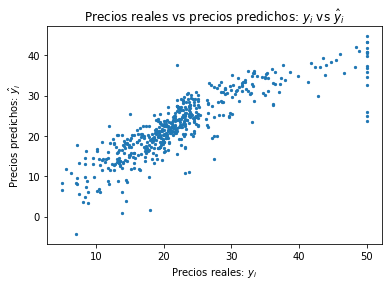

In [20]:
plt.scatter(y, y_pred, s=5)
plt.xlabel("Precios reales: $y_i$")
plt.ylabel("Precios predichos: $\hat{y}_i$")
plt.title("Precios reales vs precios predichos: $y_i$ vs $\hat{y}_i$")
pass

#### Y cómo miramos la performance del algoritmo? Usando cualquier de las métricas presentadas en la teoría y que se puede encontrar en el módul `metrics` de scikit

In [21]:
evs = sklearn.metrics.explained_variance_score(y, y_pred)
mae = sklearn.metrics.mean_absolute_error(y, y_pred)
mse = sklearn.metrics.mean_squared_error(y, Y_pred)
mne =  sklearn.metrics.median_absolute_error(y, y_pred)
r2= sklearn.metrics.r2_score(y, y_pred)

print("la varianza explicada es igual a= " , evs)
print("El error absoluto medio es igual a = " , mae)
print("El error cuadrado medio es igual a = " , mse)
print("El error absoluto mediano es igual a = ", mne)
print("el r2 es igual a = " , r2)

('la varianza explicada es igual a= ', 0.7406426641094094)
('El error absoluto medio es igual a = ', 3.270862810900317)
('El error cuadrado medio es igual a = ', 21.894831181729202)
('El error absoluto mediano es igual a = ', 2.4523106771445207)
('el r2 es igual a = ', 0.7406426641094095)


#### ¿Y como cambiaría esto si usáramos algún modo de regularización?

In [22]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

In [23]:
# Definimos los objetos de cada algoritmo de regresión lineal
clf_1 = LinearRegression() #regresión lineal sin regularización
clf_2 = Lasso() #regresión lineal con regularización LASSO
clf_3 = Ridge() #regresión lineal sin regularización RIGDE
clf_4 = ElasticNet() #regresión lineal con regularización LASSO + RIDGE

In [28]:
# Voy a meter los cuatro objetos en una lista, para usarlos en un loop
# posteriormente por economía de escritura

list_clfs = [clf_1, clf_2, clf_3, clf_4]
clas_names = ['Linear Regression', 'Lasso', 'Ridge','ElasticNet']

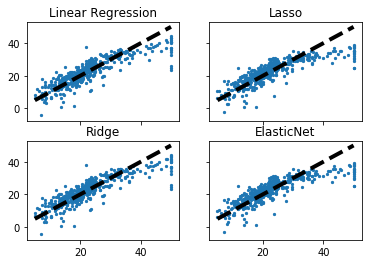

In [29]:
# Veamos el ajuste cómo es visualmente

fig, axs = plt.subplots(ncols=2, nrows=2, sharey=True, sharex=True)
axs=axs.flatten()
for idx,clf in enumerate(list_clfs):
    ax=axs[idx]
    # Hacemos fit
    clf.fit(X, Y)
    # Hacemos predict
    Y_pred = clf.predict(X)
    
    axs[idx].scatter(Y, Y_pred, s=5)
    axs[idx].plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=4)
    axs[idx].set_xlabel('')
    axs[idx].set_ylabel('')
    axs[idx].set_title(clas_names[idx])
plt.show()

In [30]:
# ¿Cómo de buena es la regresión?
for idx,clf in enumerate(list_clfs):
    # Hacemos fit
    clf.fit(X, Y)
    # Hacemos predict
    Y_pred = clf.predict(X)
    
    evs = sklearn.metrics.explained_variance_score(Y, Y_pred)
    mae = sklearn.metrics.mean_absolute_error(Y, Y_pred)
    mse = sklearn.metrics.mean_squared_error(Y, Y_pred)
    mne=  sklearn.metrics.median_absolute_error(Y, Y_pred)
    r2= sklearn.metrics.r2_score(Y, Y_pred)
    
    print(" las metricas para el modelo ", clas_names[idx], " son ")
    print("evs = " , np.round(evs, 3), " mae= ", np.round(mae,3), " mse= ",np.round(mse,3),\
          " mne = ", np.round(mne,3), " r2 = ", np.round(r2, 3))
    print(" ")
    

(' las metricas para el modelo ', 'Linear Regression', ' son ')
('evs = ', 0.741, ' mae= ', 3.271, ' mse= ', 21.895, ' mne = ', 2.452, ' r2 = ', 0.741)
 
(' las metricas para el modelo ', 'Lasso', ' son ')
('evs = ', 0.683, ' mae= ', 3.612, ' mse= ', 26.796, ' mne = ', 2.581, ' r2 = ', 0.683)
 
(' las metricas para el modelo ', 'Ridge', ' son ')
('evs = ', 0.739, ' mae= ', 3.265, ' mse= ', 22.044, ' mne = ', 2.327, ' r2 = ', 0.739)
 
(' las metricas para el modelo ', 'ElasticNet', ' son ')
('evs = ', 0.686, ' mae= ', 3.595, ' mse= ', 26.499, ' mne = ', 2.544, ' r2 = ', 0.686)
 
